In [1]:
# Import libraries.
using Turing, StatsPlots, Random, Memoization

In [2]:
N = 10000
INFALG = IS()
PRIOR_POLICY = [1,1]
PDIRAC = 0.98

0.98

In [3]:
@model function agent(is_odd_player, opponent_chn, opponent_history, opp_prior_policy = [1,1], depth = 1)
    beta_opp ~ Beta(opp_prior_policy[1], opp_prior_policy[2]) #prior
    if depth == 0
        for i in 1:length(opponent_history)
            opponent_history[i] ~ Bernoulli(beta_opp) # observe
        end
        next_opp_move ~ Bernoulli(beta_opp) # sample
    end
    if depth > 0
        weights = exp.(opponent_chn[:lp][:, 1])
        idx ~ Categorical(weights/sum(weights))
        opp_move_sample = opponent_chn[:my_move][idx, 1]
        opp_move_sample = convert(Bool,opp_move_sample)
        next_opp_move ~ Bernoulli(opp_move_sample ? PDIRAC : 1 - PDIRAC) # observe
    end
    if is_odd_player
        winning_move = 1 - next_opp_move
    else
        winning_move = next_opp_move
    end
    winning_move = convert(Bool,winning_move)
    my_move ~ Bernoulli(winning_move ? PDIRAC : 1 - PDIRAC) # Dirac(my_move)
end

agent (generic function with 3 methods)

the infece is about the opponent model and not my model

In [6]:
# Plot the results
function plotChn(chn)
    histogram(chn[:my_move], weights=exp.(chn[:lp]), normalize=:probability)
end

plotChn (generic function with 1 method)

In [4]:
function run_two_agents_theory_of_mind(odd_player_prespective, first_model, second_model, my_prior, opponent_prior, first_player_history, second_player_history ,depth)
    second_chn_i = []
    first_chn_i = []
    for i in 0:depth
        first_chn_i = sample(first_model(!odd_player_prespective, second_chn_i, second_player_history, my_prior, i),  INFALG, N)
        second_chn_i = sample(second_model(odd_player_prespective, first_chn_i, first_player_history, opponent_prior, i), INFALG, N)
    end
    plotChn(second_chn_i)
end

run_two_agents_theory_of_mind (generic function with 1 method)

### depth = 0

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


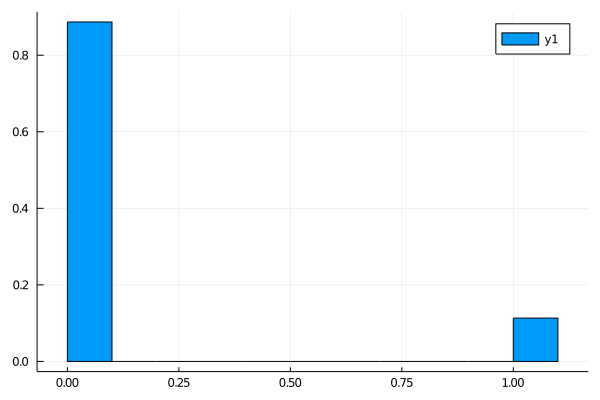

In [7]:
run_two_agents_theory_of_mind(true, agent, agent, [10, 1] , [10, 1], [], [], 0)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


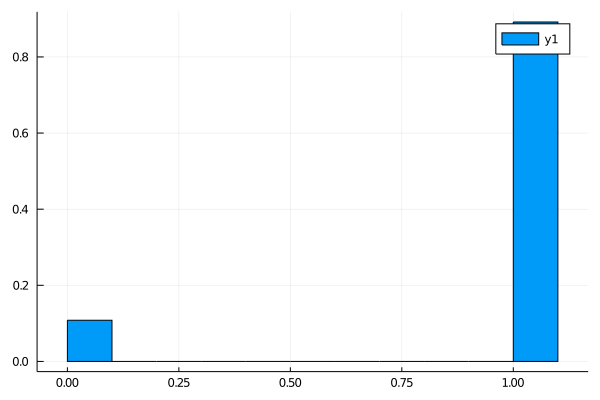

In [8]:
run_two_agents_theory_of_mind(false, agent, agent, [10, 1] , [10, 1], [], [], 0)

### depth = 3

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06


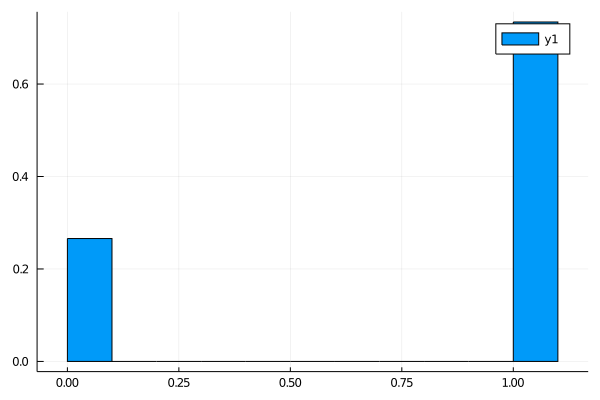

In [9]:
run_two_agents_theory_of_mind(true, agent, agent, [10, 1] , [10, 1], [], [], 3)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08


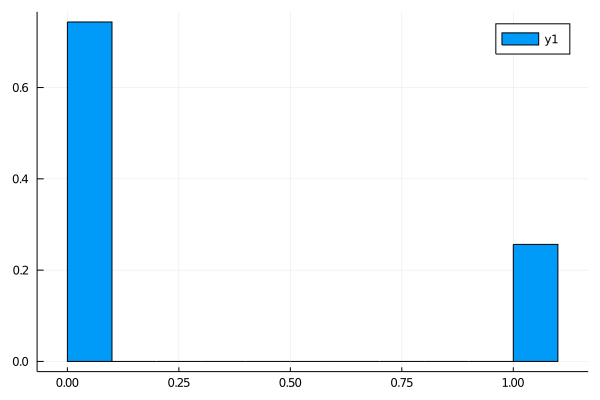

In [10]:
run_two_agents_theory_of_mind(false, agent, agent, [10, 1] , [10, 1], [], [], 3)

### depth = 10

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 

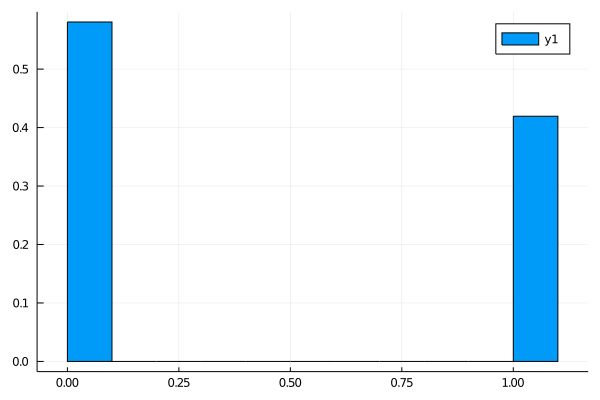

In [11]:
run_two_agents_theory_of_mind(true, agent, agent, [10, 1] , [10, 1], [], [], 10)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 

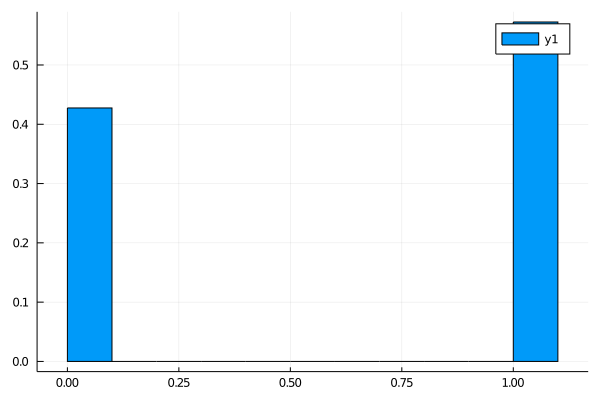

In [12]:
run_two_agents_theory_of_mind(false, agent, agent, [10, 1] , [10, 1], [], [], 10)

### depth = 20

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 

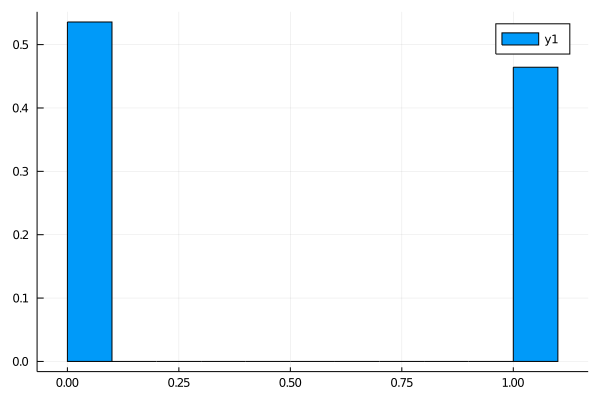

In [13]:
run_two_agents_theory_of_mind(true, agent, agent, [10, 1] , [10, 1], [], [], 20)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 

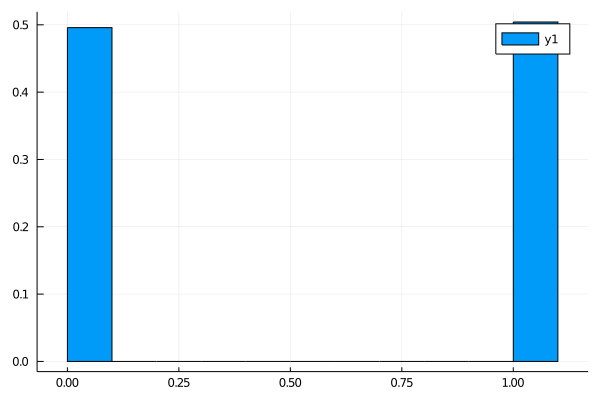

In [14]:
run_two_agents_theory_of_mind(false, agent, agent, [10, 1] , [10, 1], [], [], 20)

## Simulations

In [15]:
function sample_move(chn)
    weights = exp.(chn[:lp][:, 1])
    weights = Weights(weights/sum(weights))
    idx = sample(collect(1:length(weights)), weights)
    move_sample = chn[:my_move][idx, 1]
    return move_sample
end

sample_move (generic function with 1 method)

In [ ]:
function move(agent, other_agent, other_agent_history, my_history, other_player_prior, my_depth=1)
    other_agent_history = length(other_agent_history) > 0 ? other_agent_history : [1]
    other_agent_history = Array{Int}(other_agent_history)
    my_history = length(my_history) > 0 ? my_history : [1]
    my_history = Array{Int}(my_history)
    m = agent(other_agent, other_agent_history, other_player_prior, my_depth)
    chain = run_two_agents_theory_of_mind(agent, other_agent, other_player_prior, [1,1,1] , other_agent_history, my_history, my_depth, false)
    return sample_move(chain), chain
end